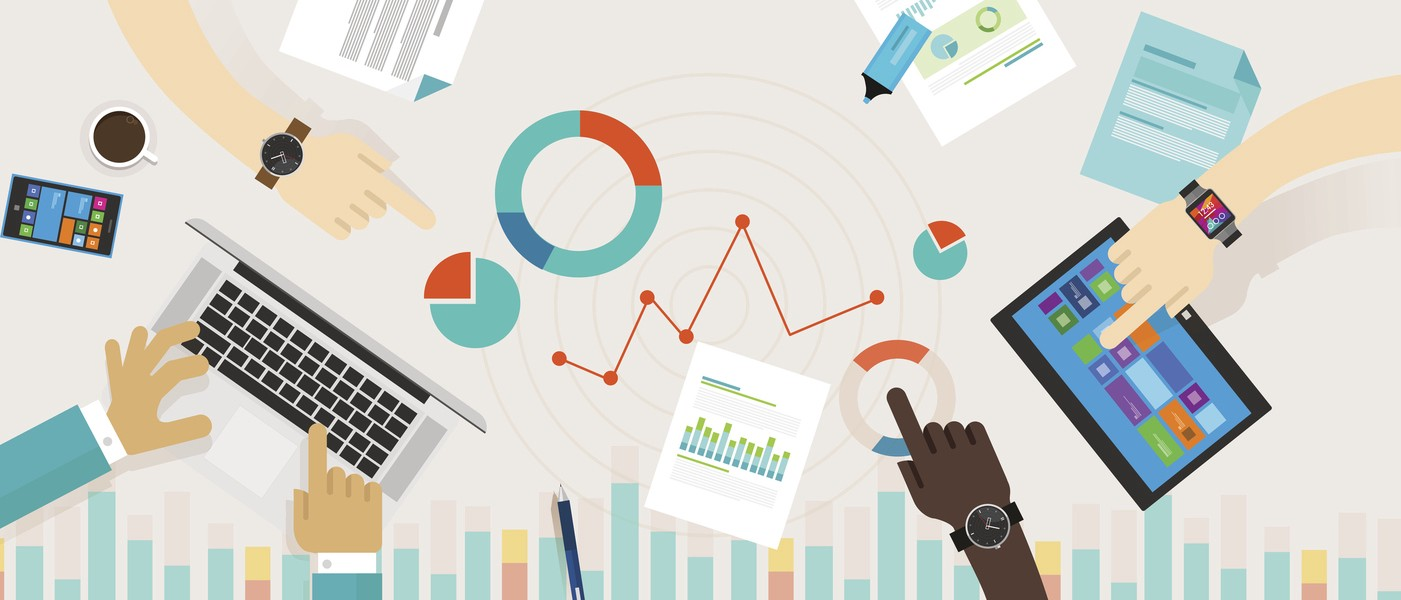


# What is Data analysis?

## Data analysis is a process of inspecting, cleansing, transforming and modeling data with the goal of discovering useful information, informing conclusions and supporting decision-making. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains. In today's business world, data analysis plays a role in making decisions more scientific and helping businesses operate more effectively.(According to wikipedia)


# Who is Data Analyst?

## Data analysts translate numbers into plain English Every business collects data, whether it's sales figures, market research, logistics, or transportation costs. A data analyst's job is to take that data and use it to help companies make better business decisions. This could mean figuring out how to price new materials for the market, how to reduce transportation costs, solve issues that cost the company money, or determine how many people should be working on Saturdays.

## post a jobThere are many different types of data analysts in the field, including operations analysts, marketing analysts, financial analysts, etc.

# WHAT ARE THE EDUCATION REQUIREMENTS?

## A bachelor's degree is needed for most entry-level jobs, and a master's degree will be needed for many upper-level jobs. Most analysts will have degrees in fields like math, statistics, computer science, or something closely related to their field. Strong math and analysis skills are needed.

# HOW MUCH DO DATA ANALYSTS MAKE?

## We will analyze it from dataset.... :p :p

# If you like it, Please upvote

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-jobs/DataAnalyst.csv


In [2]:
# Load dataset by panda
data = pd.read_csv("/kaggle/input/data-analyst-jobs/DataAnalyst.csv")

In [3]:
# Shape of dataset
data.shape

(2253, 16)

In [4]:
# Some information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [5]:
# first 5 row of dataset
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [6]:
# drop Unnamed: 0
data.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
# rename some column
data.rename(columns = {'Salary Estimate':'Salary_Estimate', 'Type of ownership':'Ownership_type'}, inplace = True) 

## We can see that they replace NaN by -1
## I replace it by NaN

In [8]:
# replace null value
def fill_null(col_name, rep, rep_val):
    data[col_name].replace(to_replace=rep, value=rep_val, inplace=True)

In [9]:
fill_null("Competitors", "-1", np.nan)
fill_null("Easy Apply", "-1", "False")
fill_null("Rating", -1.0, np.nan)
fill_null("Size", "-1", np.nan)
fill_null("Founded", -1, np.nan)
fill_null("Industry", "-1", np.nan)
fill_null("Sector", "-1", np.nan)
fill_null("Ownership_type", "-1", np.nan)
fill_null("Revenue", "-1", np.nan)

In [10]:
# You can use

# data.replace(to_replace =-1 , value=np.nan,inplace=True)
# data.replace(to_replace ='-1' , value=np.nan,inplace=True)
# data.replace(to_replace =-1.0 , value=np.nan,inplace=True)


# but i like to explore and create function

# Data cleaning

In [11]:
def clean_data(name):
    data[name] = data[name].str.replace(r'\r\n|\r|\n\d*[0-9](|.\d*[0-9]|)*$', '')
    data[name] = data[name].str.replace(r'\r\n|\r|\n', ' ')

In [12]:
# clean some unnecessary things from data
clean_data("Company Name")
clean_data("Job Description")
clean_data("Salary_Estimate")

In [13]:
# replace $ sign, K sign

def change_form_of_value(Value):
    change = Value.replace("$", "")
    if "K" in change:
        change = (change.replace("K",""))
    return change

In [14]:
# apply function
data["Salary_Estimate"] = data["Salary_Estimate"].apply(lambda x: change_form_of_value(x))

In [15]:
# split by "-"
divide = data["Salary_Estimate"].str.split("-", expand=True)

In [16]:
# convert numeric by extract
data['MinSalary'] = pd.to_numeric(divide[0].str.extract('(\d+)', expand=False)) * 1000

In [17]:
data["MaxSalary"] = pd.to_numeric(divide[1].str.extract('(\d+)', expand=False)) * 1000

In [18]:
data.head(3)

,Job Title,Salary_Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership_type,Industry,Sector,Revenue,Competitors,Easy Apply,MinSalary,MaxSalary
0,"Data Analyst, Center on Immigration and Justic...",37-66 (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37000.0,66000
1,Quality Data Analyst,37-66 (Glassdoor est.),Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,False,37000.0,66000
2,"Senior Data Analyst, Insights & Analytics Team...",37-66 (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37000.0,66000


In [19]:
print("Jobs and total job post")
print("********************************************")
print(data["Job Title"].value_counts()[:30])

Jobs and total job post
********************************************
Data Analyst                               405
Senior Data Analyst                         90
Junior Data Analyst                         30
Business Data Analyst                       28
Sr. Data Analyst                            21
Data Quality Analyst                        17
Data Analyst II                             17
Data Analyst Junior                         17
Data Governance Analyst                     16
Lead Data Analyst                           15
Data Reporting Analyst                      13
Financial Data Analyst                      12
Data Analyst I                              11
Data Analyst III                            11
Sr Data Analyst                              9
Marketing Data Analyst                       9
Data Warehouse Analyst                       8
Data Management Analyst                      8
Data Science Analyst                         7
Technical Data Analyst                

# Connt of all rated jobs

In [20]:
rat_jobs = data["Rating"].value_counts()

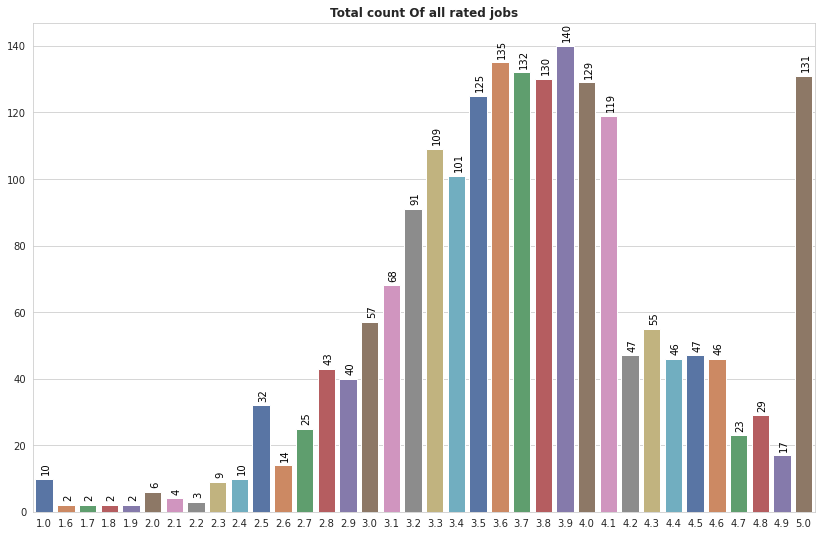

In [21]:
fig, ax = plt.subplots(figsize=(14,9))
rect1 = sns.barplot(x=rat_jobs.index, y=rat_jobs.values, palette="deep")
ax.set_title("Total count Of all rated jobs", fontweight="bold")

for p in rect1.patches:
    rect1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()+1.3), ha='center', va='bottom', color= 'black', rotation=90)

## Max Jobs for rating is 3.9 ==> 140
## 3.6 rated ==> 136
## 5.0 rated ==> 131

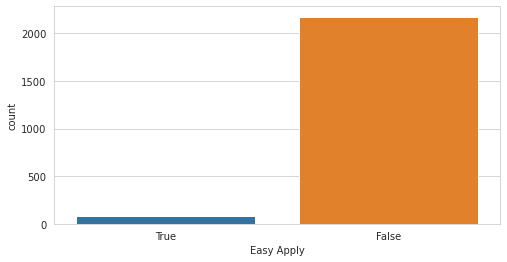

In [22]:
plt.subplots(figsize=(8,4))
sns.countplot(data["Easy Apply"])

# 30 Company and their highest minimum salary

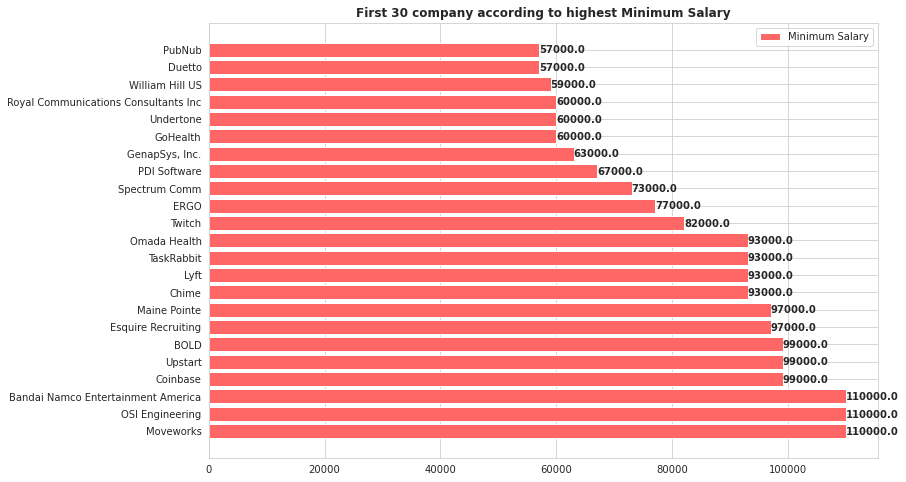

In [23]:
easy_apply = data.copy()
easy_apply = data[data["Easy Apply"] == "True"].sort_values("MinSalary", ascending=False)[:30]
easy_apply.drop_duplicates(subset ="Company Name",keep=False,inplace=True)

plt.subplots(figsize=(12, 8))
rect2 = plt.barh(easy_apply["Company Name"], easy_apply["MinSalary"], label="Minimum Salary", color="#ff6767")
plt.legend()
plt.title("First 30 company according to highest Minimum Salary", fontweight="bold")

for index, value in enumerate(easy_apply["MinSalary"]):

    plt.text(value, index - 0.2, str(value), fontweight="bold")

# Data Analyst and their Min Max Salary

In [24]:
def jobVSsalary(title):
    data_analyst = data[data["Job Title"]==title]


    sns.set(style="white", palette="vlag", color_codes=True)


    f, ax = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
    sns.despine(left=True)

    #Plot a histogram and kernel density estimate

    sns.distplot(data_analyst['MinSalary'], color="b", ax=ax[0])

    sns.distplot(data_analyst['MaxSalary'], color="r",ax=ax[1])

    plt.setp(ax, yticks=[])
    plt.tight_layout()
    plt.suptitle(f" Min and Max Salary for {title}")

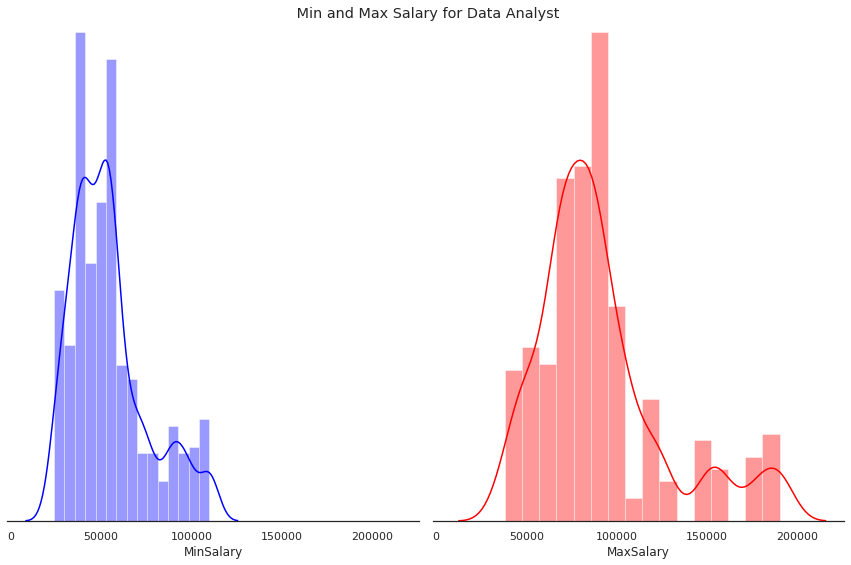

In [25]:
# for data analyst
jobVSsalary("Data Analyst")

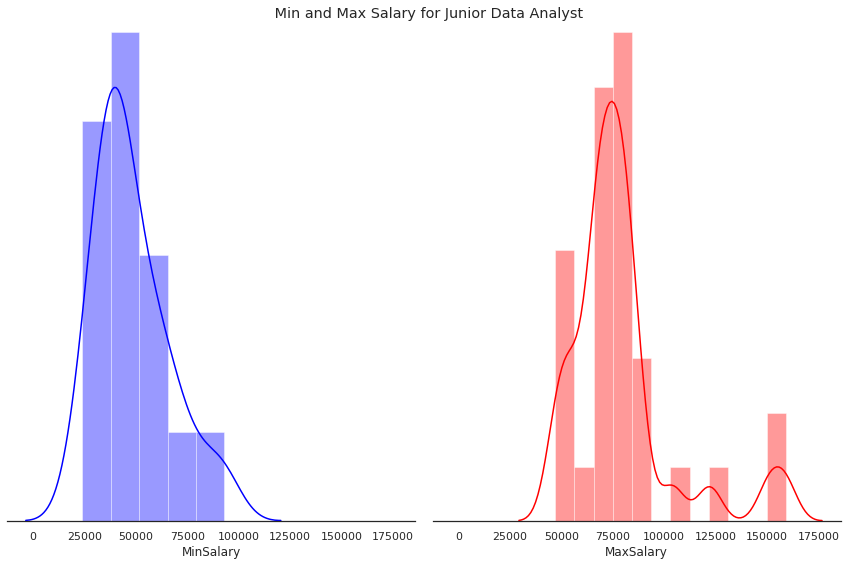

In [26]:
# Junior Data Analyst
jobVSsalary("Junior Data Analyst")

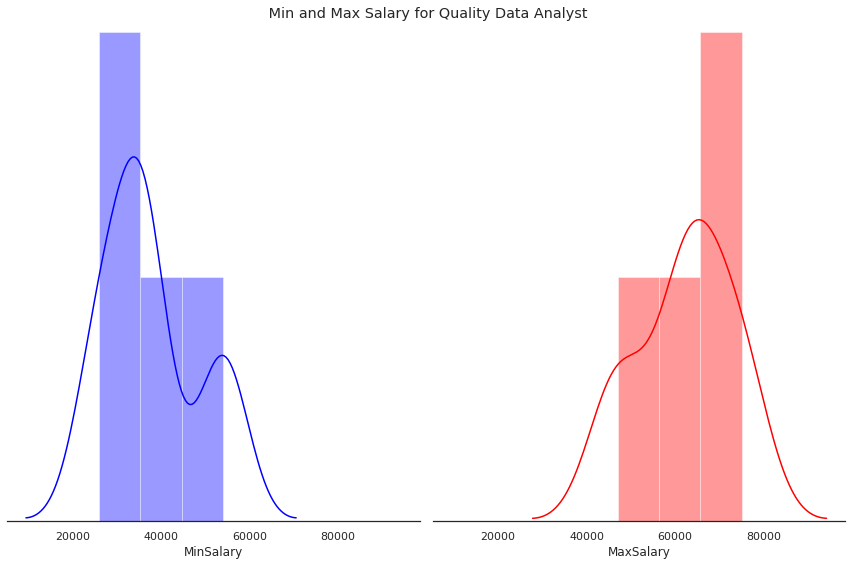

In [27]:
# Quality Data Analyst
jobVSsalary("Quality Data Analyst")

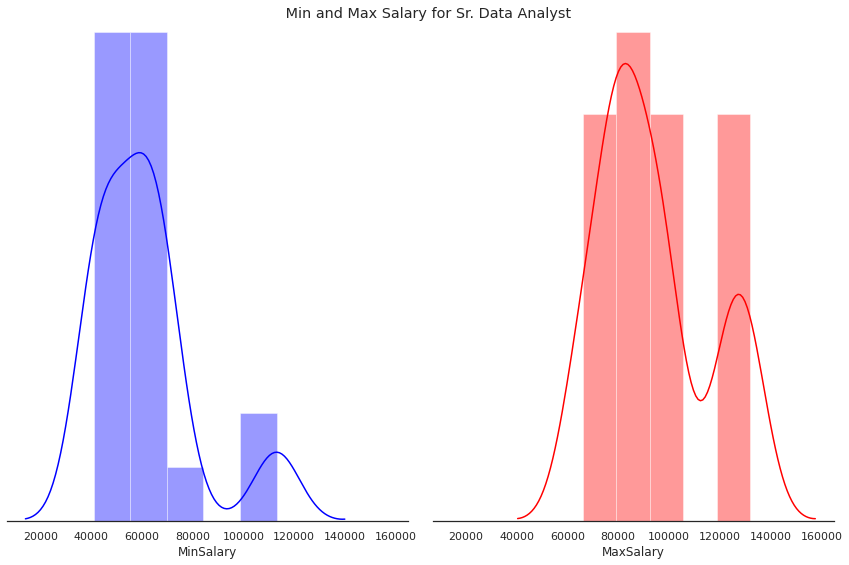

In [28]:
# for Senior data Analyst
jobVSsalary("Sr. Data Analyst")

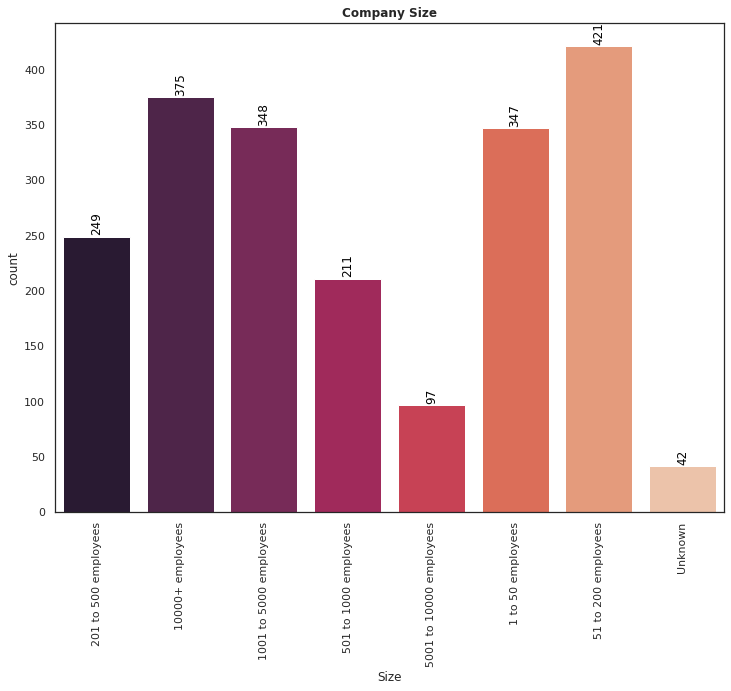

In [29]:
# Company Size Count
plt.subplots(figsize=(12,9))
rect3 = sns.countplot(x=data["Size"], palette="rocket")
plt.xticks(rotation=90)
plt.title("Company Size", fontweight="bold")
for p in rect3.patches:
    rect3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1.3), ha='center', va='bottom', color= 'black', rotation=90)

# 421 of the company size is 51 to 200 employees

In [30]:
print("Ownership type in different sectors and count of total company")
print("*****************************************")
ownership = data["Ownership_type"].value_counts()
print(ownership)

Ownership type in different sectors and count of total company
*****************************************
Company - Private                 1273
Company - Public                   452
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
Private Practice / Firm              9
School / School District             9
Self-employed                        2
Franchise                            2
Name: Ownership_type, dtype: int64


# Count of different sector

Text(0.5, 1.0, 'Counts of different sectors')

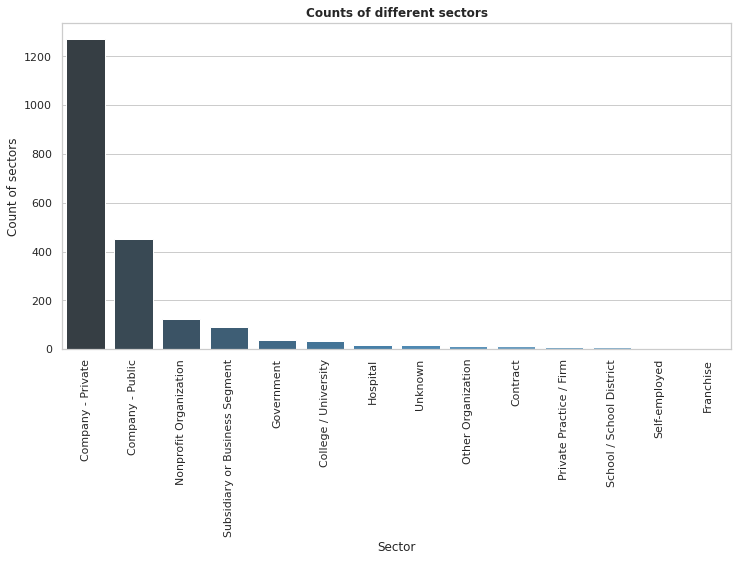

In [31]:
sns.set_style("whitegrid")
plt.subplots(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x=ownership.index, y=ownership.values, palette="Blues_d")
plt.xlabel("Sector")
plt.ylabel("Count of sectors")
plt.title("Counts of different sectors", fontweight="bold")

# Clean data - Revenue Columns

In [32]:
def clean_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1]) * 1000000  # 1Million = 1000000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0]) * 1000000
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000000000 # 1Billion = 1000000000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000000000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000000000
    return revenue

# new column by extract Revenue column

In [33]:
data['MaxRevenue']=data['Revenue'].apply(lambda x: clean_revenue(x))

In [34]:
# Group of sector and maxrevenue
revenueVSsector = data.groupby("Sector")["MaxRevenue"].mean().sort_values(ascending=False)

In [35]:
revenueVSsector

Sector
Insurance                             5.465196e+09
Mining & Metals                       5.000000e+09
Aerospace & Defense                   4.884091e+09
Telecommunications                    4.778182e+09
Finance                               4.653876e+09
Retail                                4.447368e+09
Manufacturing                         4.382625e+09
Media                                 3.837857e+09
Transportation & Logistics            3.080000e+09
Biotech & Pharmaceuticals             2.835606e+09
Oil, Gas, Energy & Utilities          2.146154e+09
Health Care                           1.728311e+09
Education                             1.541635e+09
Information Technology                1.274535e+09
Arts, Entertainment & Recreation      9.285714e+08
Accounting & Legal                    7.979070e+08
Business Services                     7.885115e+08
Non-Profit                            5.246154e+08
Construction, Repair & Maintenance    5.034375e+08
Restaurants, Bars & Food

# Different Sector and Maxrevenue avarage

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

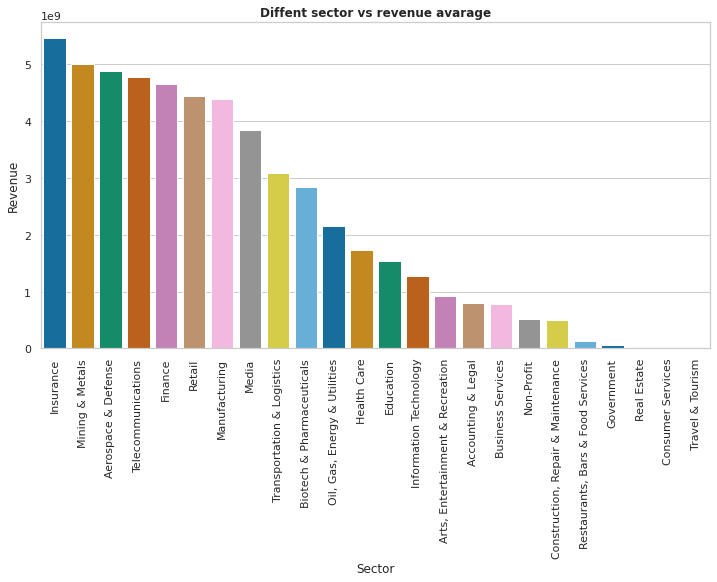

In [36]:
sns.set_style("whitegrid")
plt.subplots(figsize=(12,6))
sns.barplot(revenueVSsector.index, revenueVSsector.values, palette="colorblind")
plt.xlabel("Sector")
plt.ylabel("Revenue")
plt.title("Diffent sector vs revenue avarage", fontweight="bold")
plt.xticks(rotation=90)

# Different Industry and Maxrevenue avarage

In [37]:
revenueVSindustry = data.groupby("Industry")["MaxRevenue"].mean().sort_values(ascending=False)[:30]

In [38]:
revenueVSindustry

Industry
Miscellaneous Manufacturing                 1.000000e+10
Chemical Manufacturing                      1.000000e+10
General Merchandise & Superstores           1.000000e+10
Drug & Health Stores                        1.000000e+10
Utilities                                   1.000000e+10
Truck Rental & Leasing                      1.000000e+10
Motion Picture Production & Distribution    1.000000e+10
Grocery Stores & Supermarkets               1.000000e+10
Transportation Equipment Manufacturing      8.333333e+09
Home Centers & Hardware Stores              8.000000e+09
Investment Banking & Asset Management       6.161346e+09
Cable, Internet & Telephone Providers       6.102000e+09
Financial Analytics & Research              6.000000e+09
Insurance Carriers                          5.694149e+09
TV Broadcast & Cable Networks               5.201000e+09
Automotive Parts & Accessories Stores       5.125000e+09
Gas Stations                                5.000000e+09
Metals Brokers        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

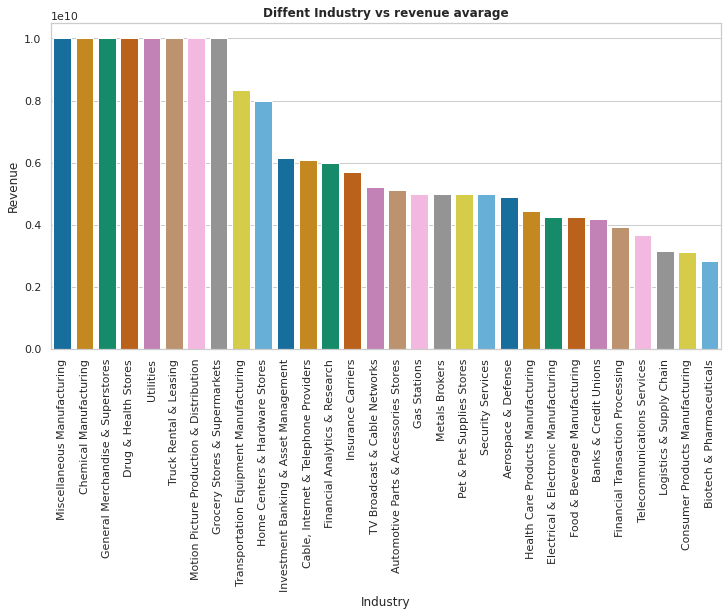

In [39]:
sns.set_style("whitegrid")
plt.subplots(figsize=(12,6))
sns.barplot(revenueVSindustry.index, revenueVSindustry.values, palette="colorblind")
plt.xlabel("Industry")
plt.ylabel("Revenue")
plt.title("Diffent Industry vs revenue avarage", fontweight="bold")
plt.xticks(rotation=90)

# Company got competitors

In [40]:
compet = data.copy()
compet_data = compet[["Company Name", "Competitors"]]

In [41]:
# first 50 company and their competitors
compet_data[compet_data["Competitors"].isnull() == False][:50]

,Company Name,Competitors
2,Squarespace,GoDaddy
4,FanDuel,DraftKings
7,GNY Insurance Companies,"Travelers, Chubb, Crum & Forster"
8,DMGT,"Thomson Reuters, Hearst, Pearson"
9,Riskified,"Signifyd, Forter"
10,NYU Langone Health,"NewYork-Presbyterian Hospital, Northwell Health"
16,Undertone,"DoubleClick, Specific Media, Collective"
17,NYSTEC,"KPMG, Accenture, Deloitte"
20,Google,"Microsoft, Apple, Facebook"
22,Macquarie Group,"Goldman Sachs, Commonwealth Bank of Australia,..."


# Job Title Vs Salary

In [42]:
JobVsSalary = data.groupby('Job Title')[['MaxSalary','MinSalary']].mean().sort_values(['MaxSalary','MinSalary'],ascending=False)[:30]

Text(0.5, 1.0, 'Location VS Salary')

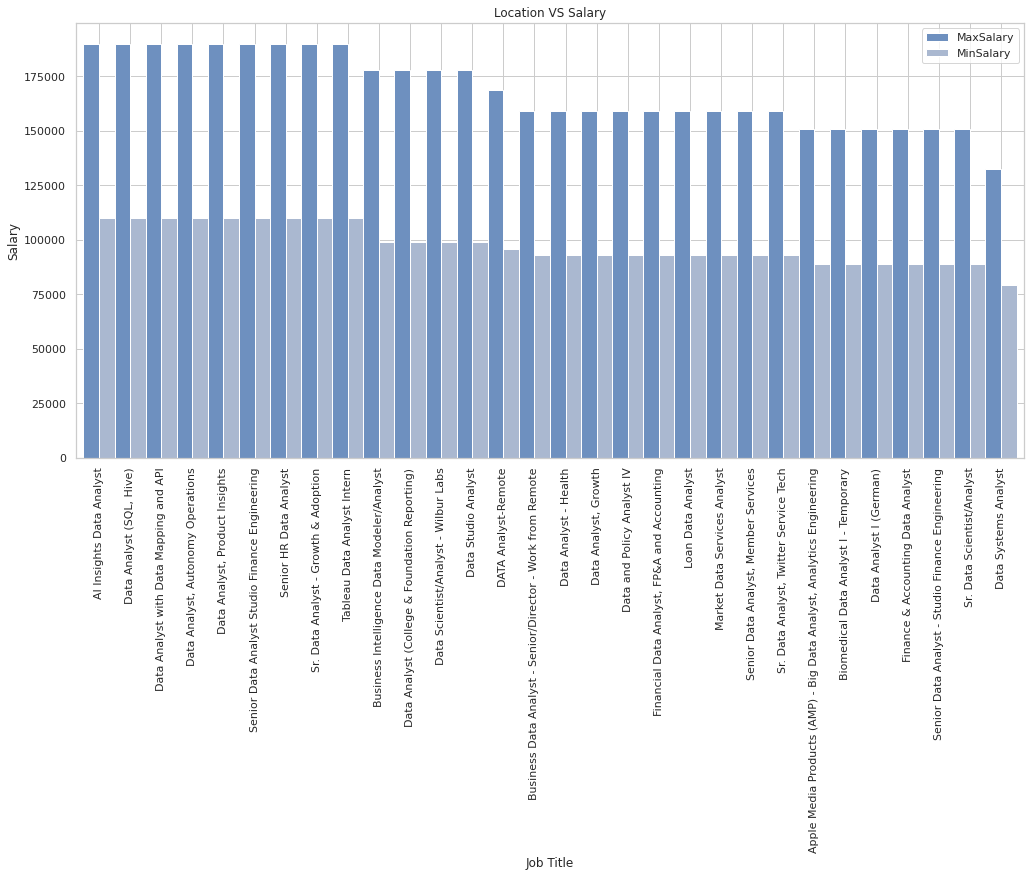

In [43]:
JobVsSalary.plot(kind="bar", figsize=(17,8), width=1.0)
plt.ylabel("Salary")
plt.title("Location VS Salary")

# Which position you want to join? 

# HAHAHA - Money Every Where

# Location VS Salary range

In [44]:
locationVSsalary = data.groupby('Location')[['MaxSalary','MinSalary']].mean().sort_values(['MaxSalary','MinSalary'],ascending=False)[:30]

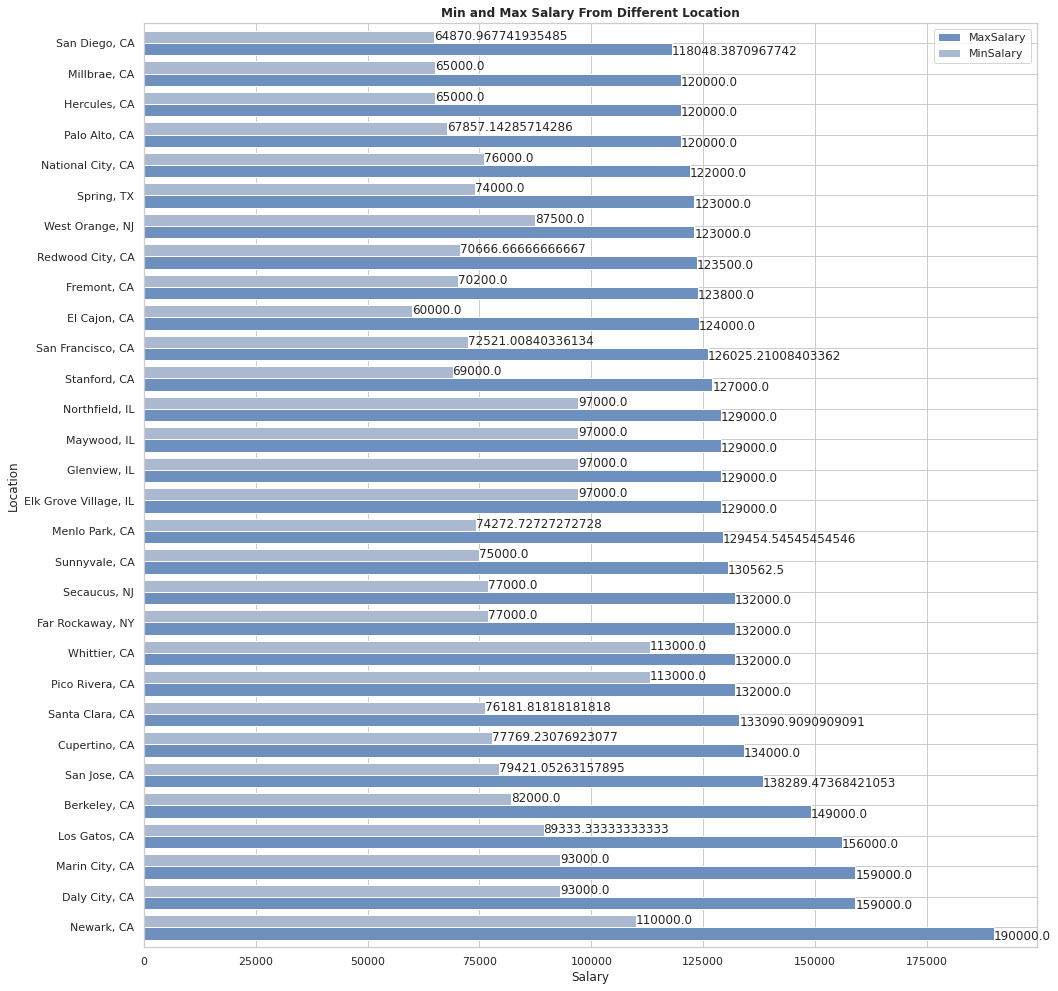

In [45]:
locationVSsalary.plot(kind="barh", figsize=(16,17), width=0.8)
plt.ylabel("Location")
plt.xlabel("Salary")
plt.title("Min and Max Salary From Different Location", fontweight="bold")

for index, value in enumerate(locationVSsalary["MaxSalary"]):
    plt.text(value + 0.5, index - 0.4, str(value))
    
    
for index, value in enumerate(locationVSsalary["MinSalary"]):
    plt.text(value + 0.2, index + 0.1, str(value))

# If you like it, Please upvote